In [1]:
%load_ext autoreload
%autoreload 2

from plot_util import *

In [2]:
savefig = False

(96000, 8) (96000,)
29459
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
reduced chi^2: 0.83
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`


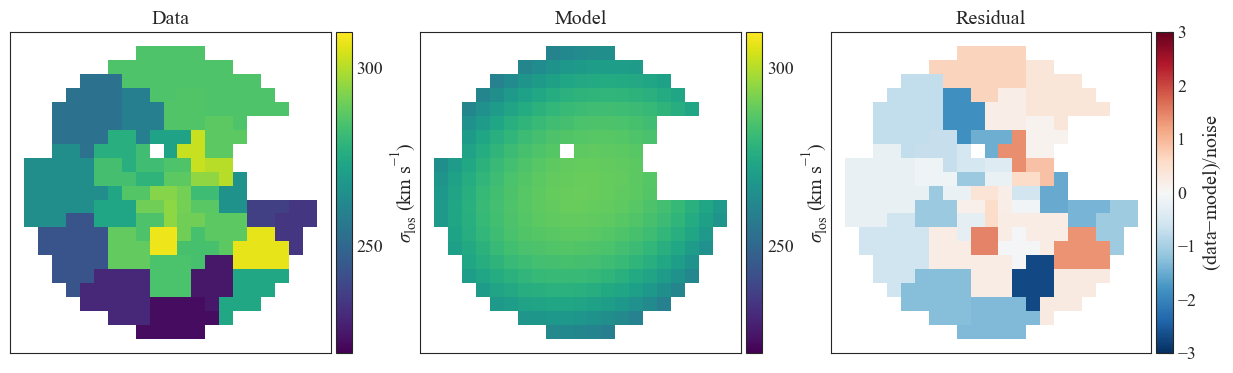

In [3]:
import matplotlib.colors as colors

pf.set_fontscale(1.6)

# cmap = palettable.cubehelix.perceptual_rainbow_16.mpl_colormap

vmax, vmin = 365, 55
mid = 265 #(vmax + vmin) / 2.
f = 25

vmax, vmin = 310, 220

def _forward(x):
    return x # np.arctan((x - mid)/f)


def _inverse(x):
    return x # np.tan(x)*f + mid


norm = colors.FuncNorm((_forward, _inverse), vmin=vmin, vmax=vmax)



fig, axes = plot_residual('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', shape='oblate',
                          burnin=None, snr=23, 
                          cmap='viridis', norm=norm
                         );

# ax.set_xticks([])
# ax.set_yticks([])

# ax.set_title('')

if savefig:
    fig.savefig('/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/jampy_constant_elliptical.pdf', 
                bbox_inches='tight'
               )
    
fig;

## oblate vs prolate

In [48]:
burnin = -200
thin = 1

(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(19200, 8) 8
Removed no burn in
Difference: 0.33%, 0.03 sigma, D uncertainty: 0.09


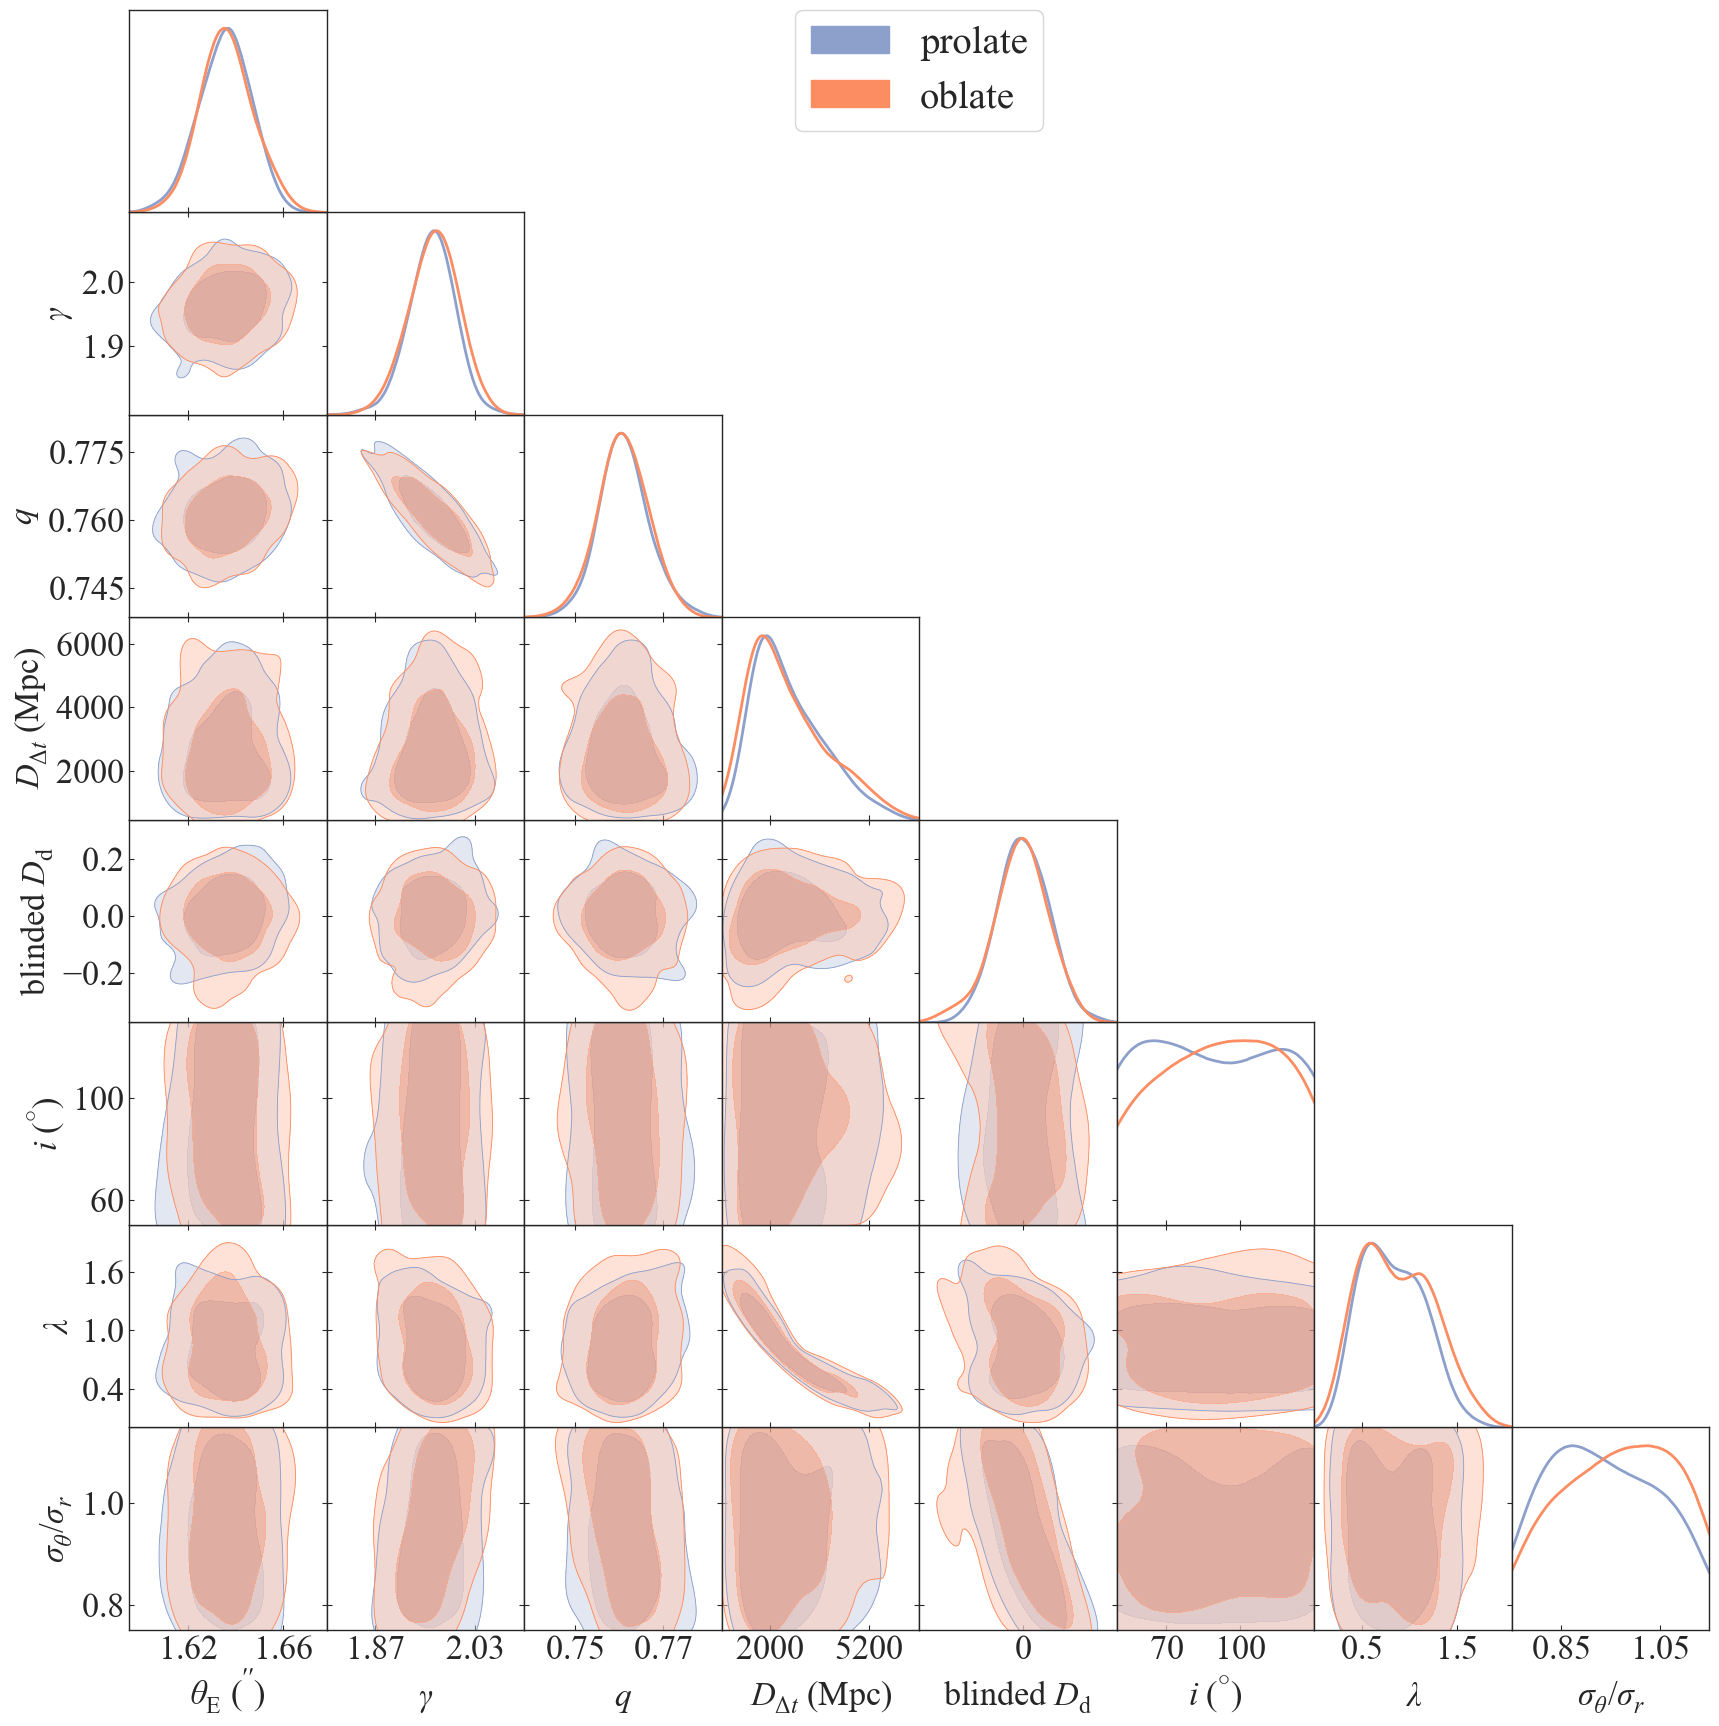

In [49]:
g = plot_dist(['jampy', 'jampy', 'jampy'][:2],
          ['ifu', 'ifu', 'ifu'][:2], 
          ['constant', 'constant', 'constant'][:2], 
          ['axisymmetric']*2, 
          ['powerlaw']*2, 
          shapes=['oblate', 'prolate'],
          #oblate_fractions=[0.17],
          burnin=burnin,
          legend_labels=[r'prolate', #r'stepwise constant $\beta$ with free breakpoint', 
                         r'oblate', #r'stepwise constant $\beta$ with free breakpoint', 
                        ][:2],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}', 
                           '(\\sigma_{\\theta}/\\sigma_{r})_{\\rm outer}', "r_{\\rm break}\ ( '' )"][:2],
          select_indices=[[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 5, 6, 7]][:2],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/pl_axisymmetric_jam_oblate_vs_prolate.pdf' if savefig else None,
          font_scale=1.7, blind=True, print_difference=True
         )

## anisotropy profiles

(21600, 9) 9
Removed no burn in
D uncertainty 0.08
(19200, 8) 8
Removed no burn in
Difference: -0.03%, -0.00 sigma, D uncertainty: 0.09


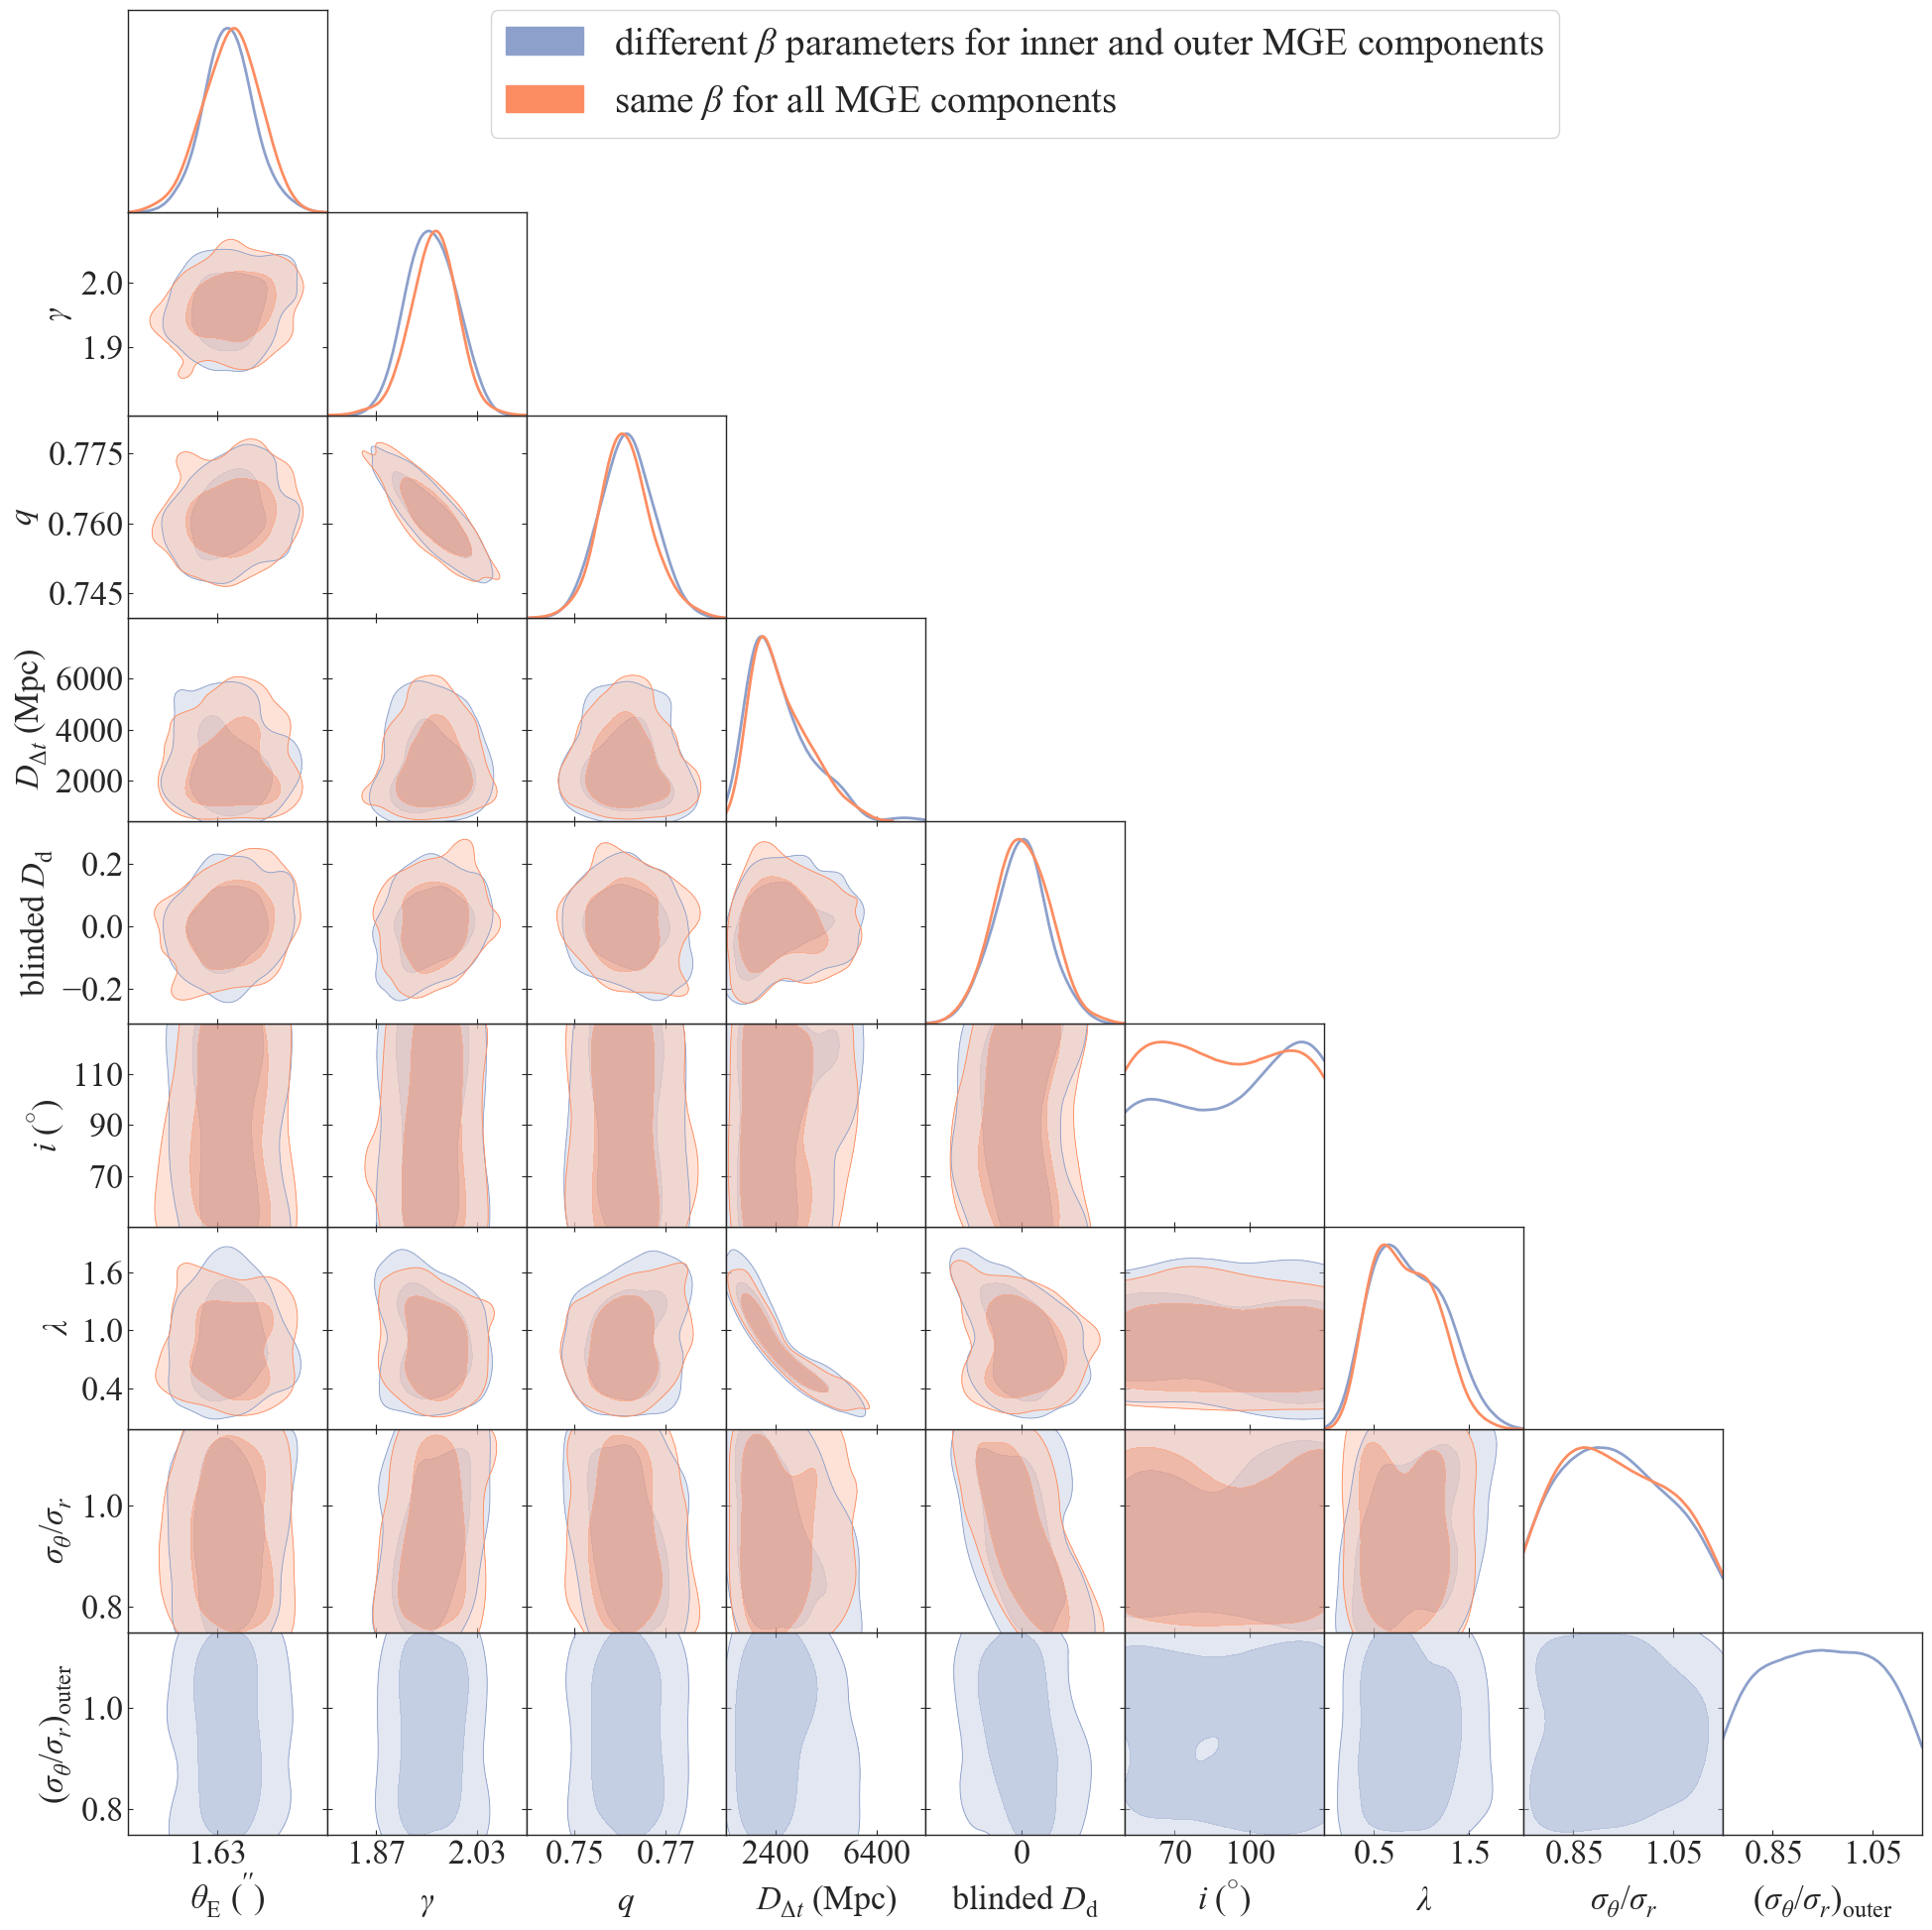

In [51]:
plot_dist(['jampy', 'jampy', 'jampy'][:2],
          ['ifu', 'ifu', 'ifu'][:2],
          ['step', 'constant'][:2],
          ['axisymmetric']*2,
          ['powerlaw']*2,
          #oblate_fractions=[1]*2,
          burnin=burnin,
          legend_labels=[#r'',
                         r'different $\beta$ parameters for inner and outer '
                         r'MGE components',
                         r'same $\beta$ for all MGE components'][:2],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}', 
                           '(\\sigma_{\\theta}/\\sigma_{r})_{\\rm outer}',
                           "r_{\\rm break}\ ( '' )"][:2],
          select_indices=[[0, 1, 2, 3, 4, 5, 6, 7, 8],
                          #[0, 1, 2, 3, 5, 6, 7, 8],
                          [0, 1, 2, 3, 4, 5, 6, 7]],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/anisotropy_compare_axisymmetric_jam.pdf' if savefig else None,
          font_scale=1.7, blind=True, print_difference=True
         )

In [52]:
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin))
print(get_bic('jampy', 'ifu', 'step', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin))
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 23,
#               'oblate', burnin=-100))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
63.74046928977265
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.99971683691435


In [54]:
(63.74046928977265 - 67.99971683691435) #, 161.2453042660473 - 170.47021961167638

-4.2592475471416975

In [57]:
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin))
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'composite', 23,
              'oblate', burnin=burnin))
# print(get_bic('jampy', 'ifu', 'free_step', 'axisymmetric', 'powerlaw', 15, 'prolate', burnin=-100))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
63.74046928977265
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
67.70675998225437


In [58]:
63.74046928977265 - 67.70675998225437


-3.9662906924817207

# power-law model

(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
D uncertainty 0.09


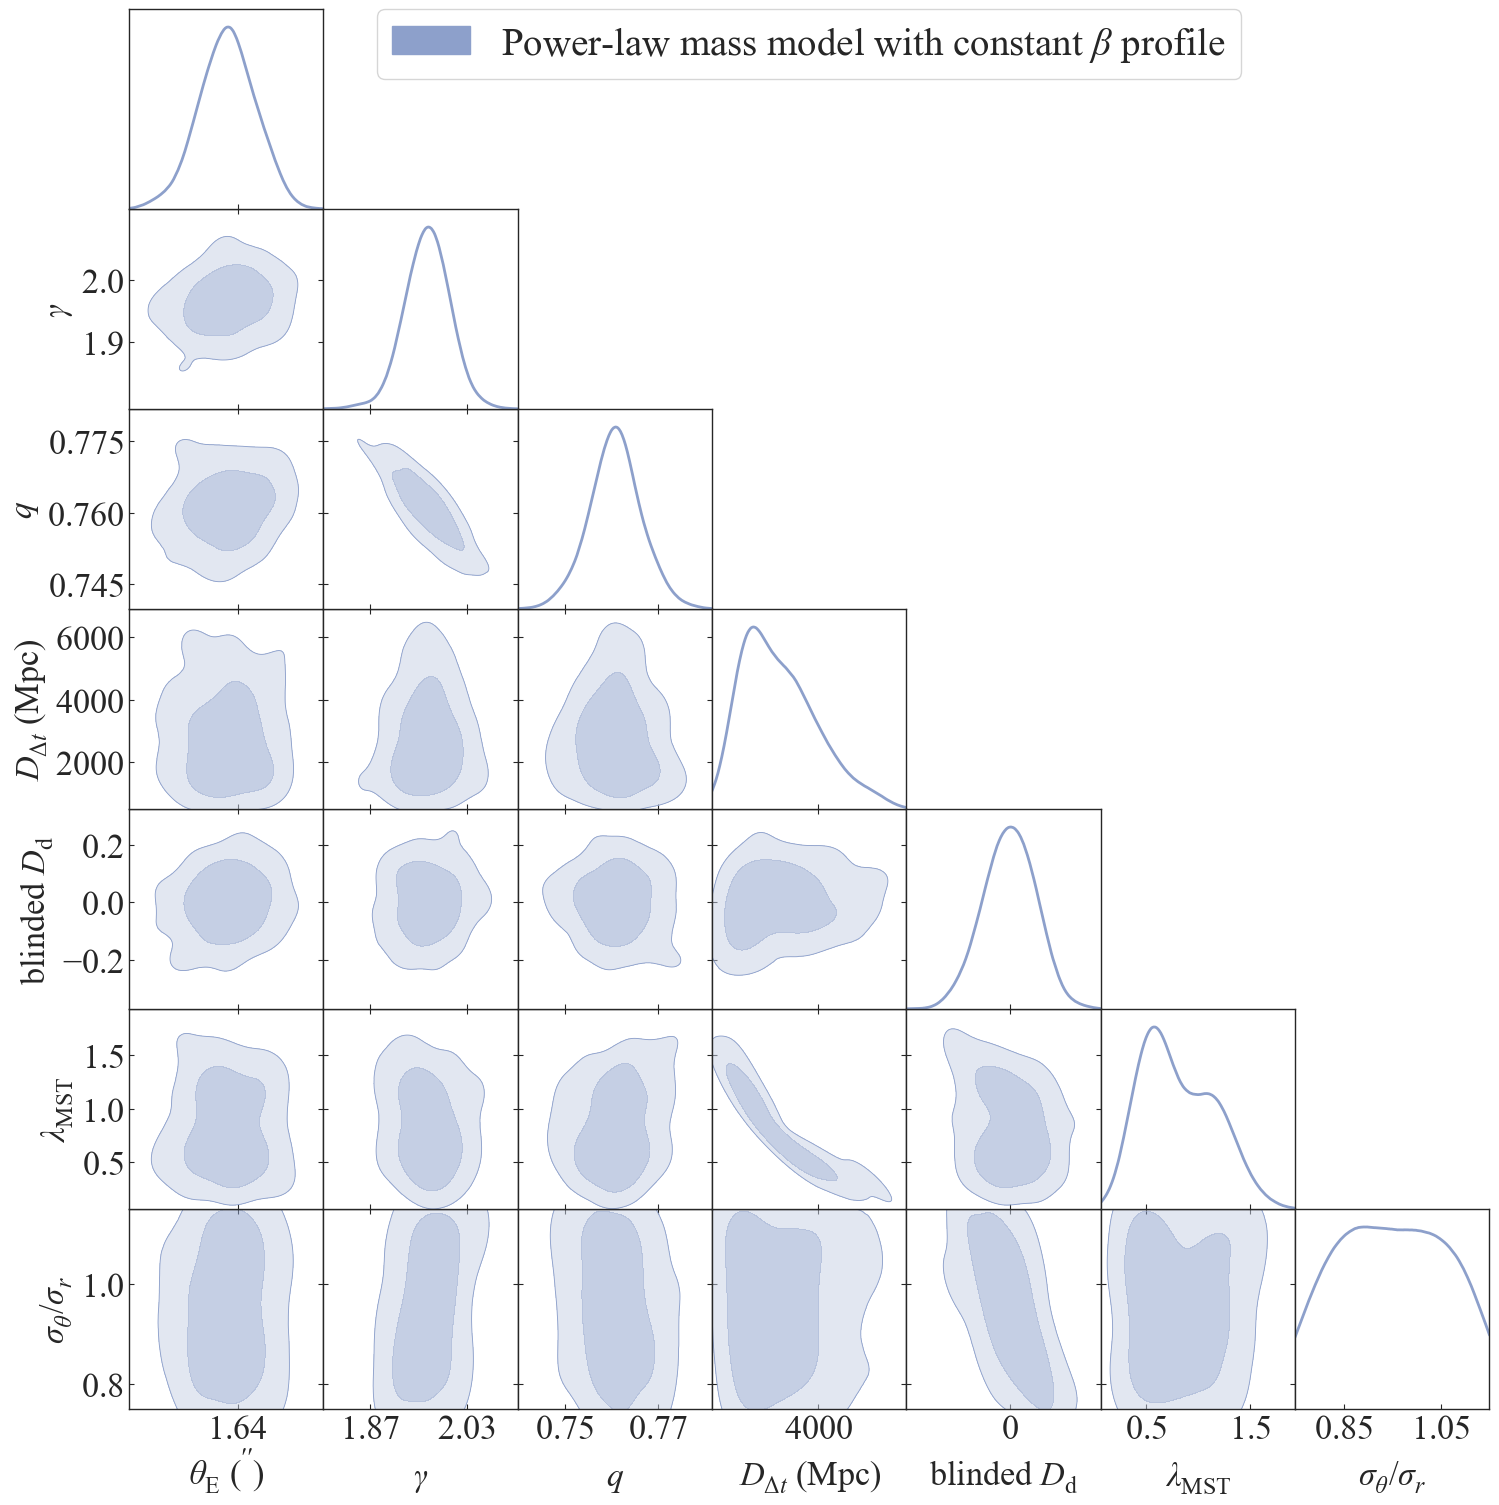

In [64]:
plot_dist(['jampy'], 
          ['ifu'], 
          ['constant'], 
          ['axisymmetric'], 
          ['powerlaw'], 
          oblate_fractions=[0.65],
          burnin=burnin,
          legend_labels=[r'Power-law mass model with constant $\beta$ '
                         r'profile'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/pl_axisymmetric_jam.pdf' if savefig else None,
          select_indices=[[0, 1, 2, 3, 4, 6, 7]],
          font_scale=1.7, blind=True
         )

# composite model

(21600, 9) (21600, 9) (21599, 9) 0.65
(21599, 9) 9
Removed no burn in
D uncertainty 0.10


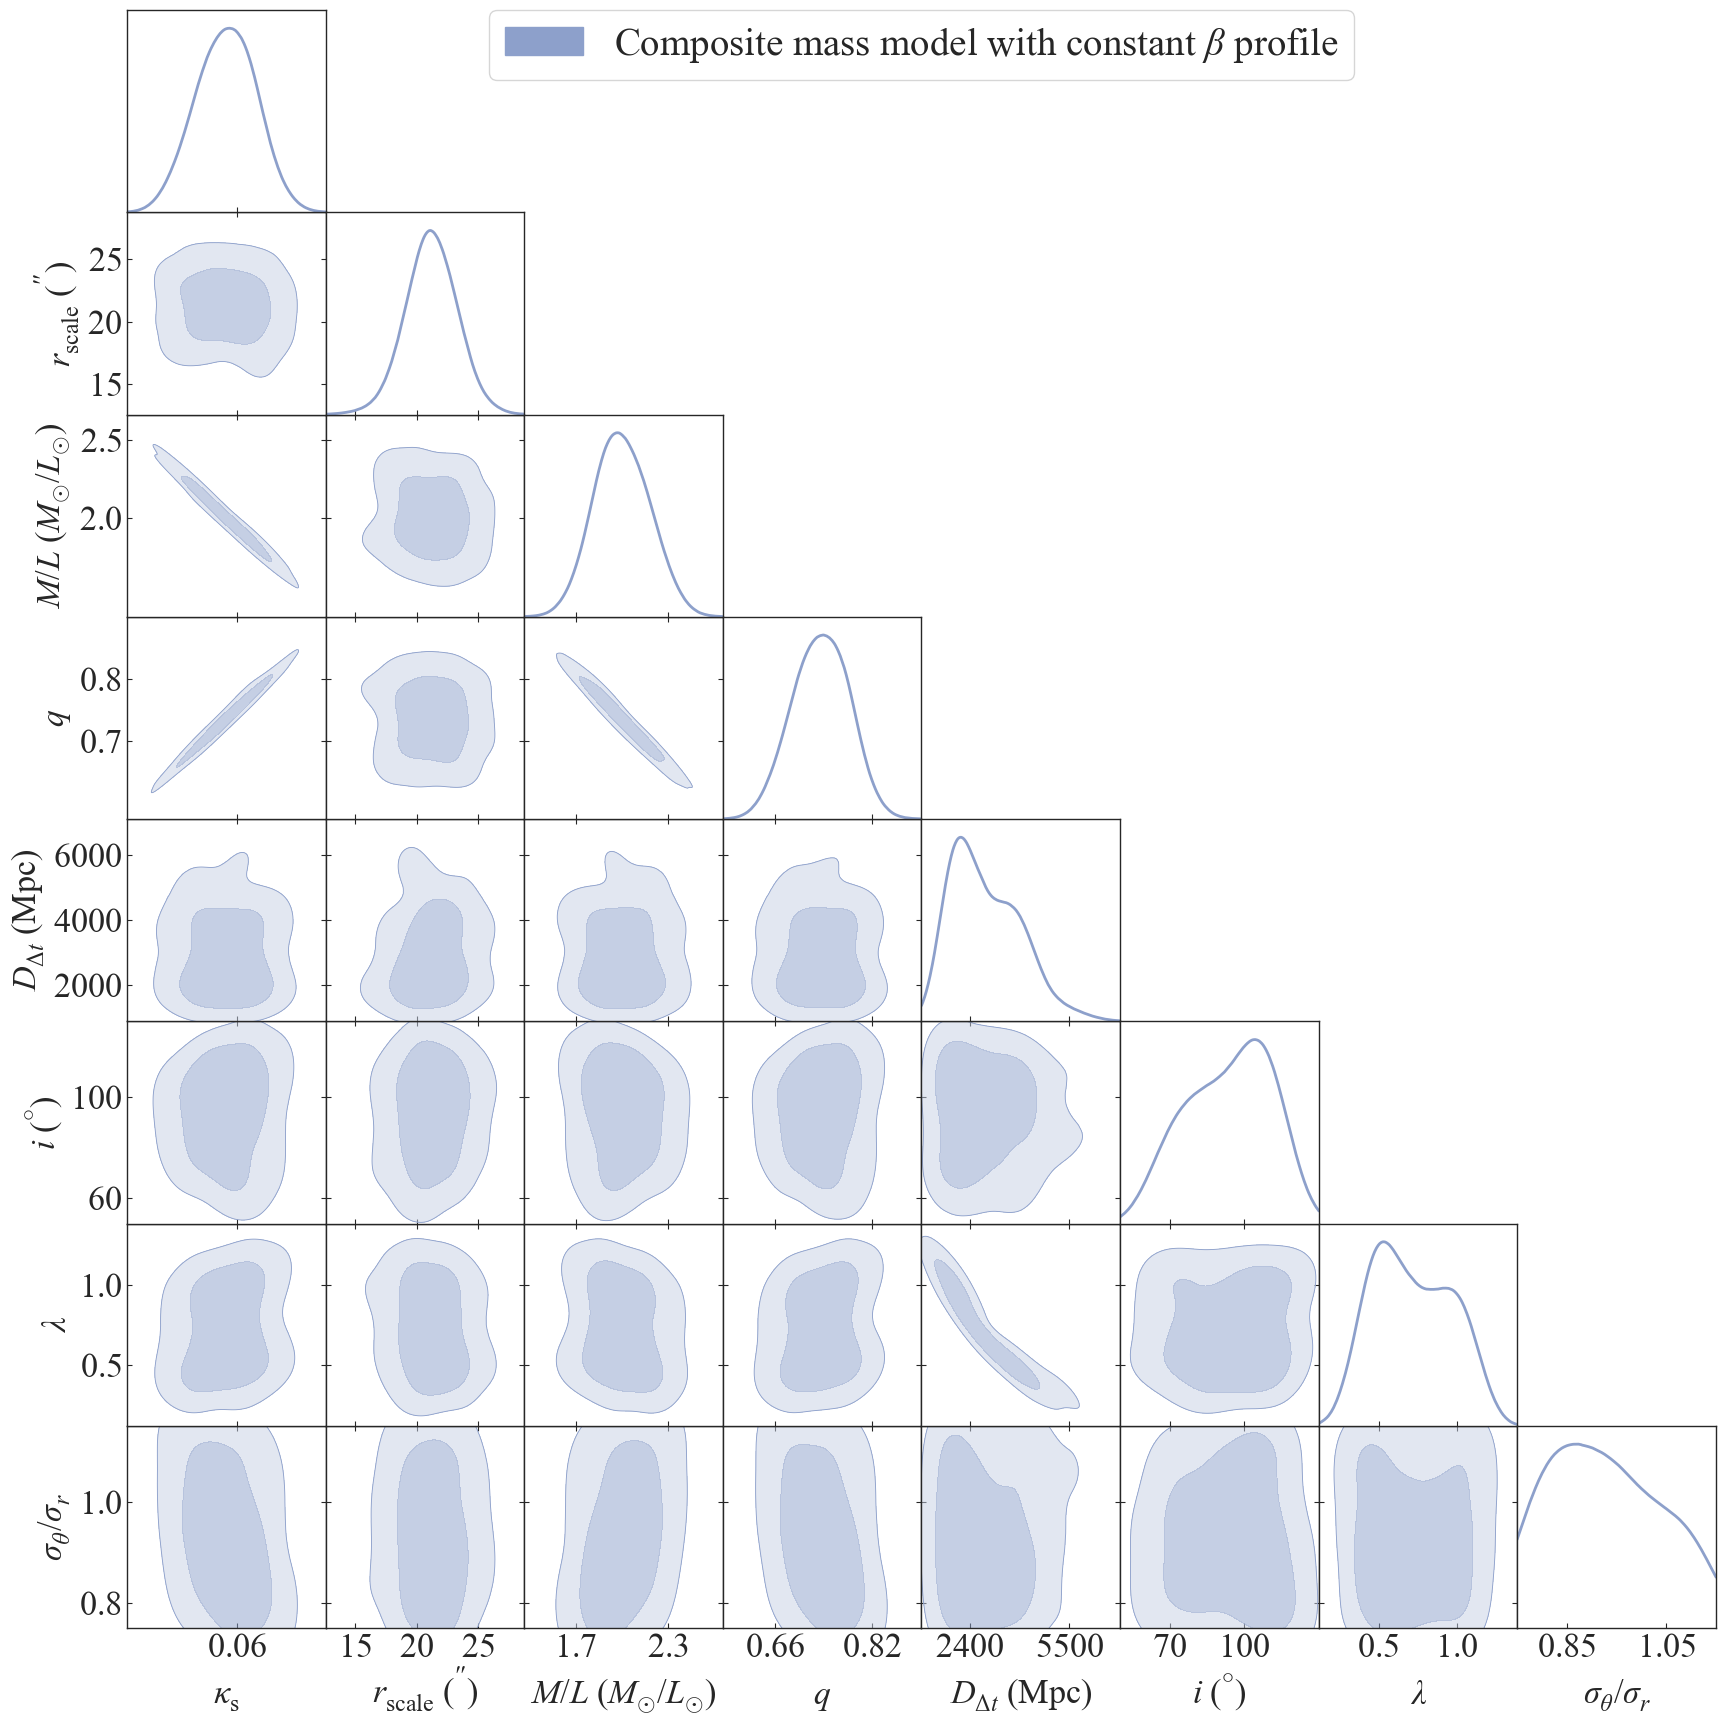

In [65]:
plot_dist(['jampy'], 
          ['ifu'], 
          ['constant'], 
          ['axisymmetric'], 
          ['composite'], 
          oblate_fractions=[0.65],
          burnin=-200, 
          legend_labels=[r'Composite mass model with constant $\beta$ '
                         r'profile'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/comp_axisymmetric_jam.pdf' if savefig else None,
          select_indices=[[0, 1, 2, 3, 4, 6, 7, 8]],
          font_scale=1.7, blind=True
         )

(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(21600, 9) (21600, 9) (21599, 9) 0.65
(21599, 9) 9
Removed no burn in
Difference: -2.14%, -0.16 sigma, D uncertainty: 0.10


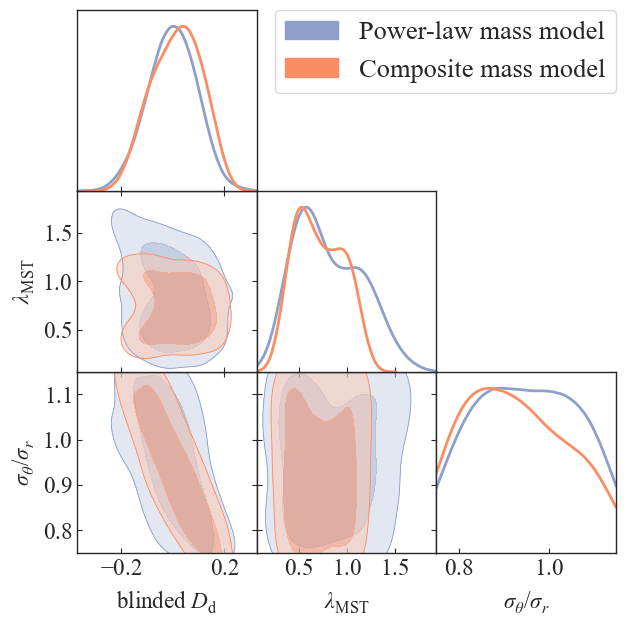

In [66]:
plot_dist(['jampy']*2, 
          ['ifu']*2, 
          ['constant']*2, 
          ['axisymmetric']*2, 
          ['powerlaw', 'composite'], 
          oblate_fractions=[0.65]*2,
          burnin=burnin,
          legend_labels=[r'Power-law mass model', r'Composite mass model'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/comp_vs_pl_axisymmetric_jam.pdf' if savefig else None,
          font_scale=1.2,
          select_indices=[[-4, -2, -1], [-4, -2, -1]], blind=True, print_difference=True
         )

(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(19200, 8) 8
Removed no burn in
Difference: 0.33%, 0.03 sigma, D uncertainty: 0.09


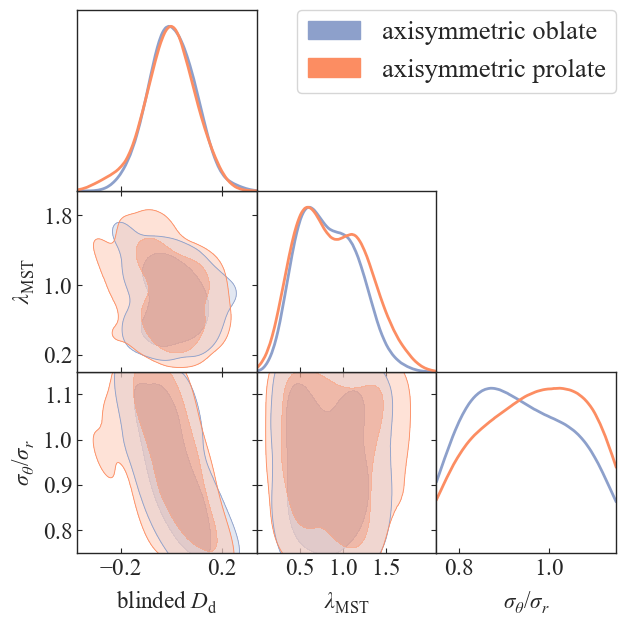

In [67]:
plot_dist(['jampy', 'jampy'], 
          ['ifu', 'ifu'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'axisymmetric'], 
          ['powerlaw', 'powerlaw'],
          snrs=[23, 23],
          shapes=['oblate', 'prolate'],
          burnin=burnin,
          legend_labels=[r'axisymmetric oblate', r'axisymmetric prolate'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/prolate_vs_oblate_compare.pdf' if savefig else None,
          font_scale=1.2,
          select_indices=[[-4, -2, -1]]*2, blind=True, print_difference=True
         )

In [5]:
20 / 323 * 293

18.142414860681114

(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(19200, 8) 8
Removed no burn in
Difference: -1.48%, -0.12 sigma, D uncertainty: 0.09


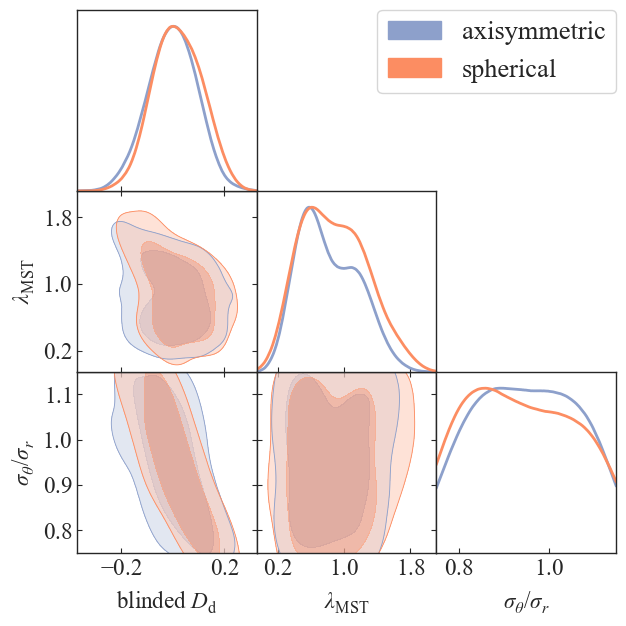

In [68]:
plot_dist(['jampy', 'jampy'], 
          ['ifu', 'ifu'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'spherical'], 
          ['powerlaw', 'powerlaw'],
          oblate_fractions=[0.65, None],
          burnin=burnin,
          legend_labels=[r'axisymmetric', r'spherical'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/axisymmetric_vs_spherical_compare.pdf' if savefig else None,
          font_scale=1.2,
          select_indices=[[-4, -2, -1]]*2, blind=True, print_difference=True
         )

In [15]:
# # OM anisotropy
# plot_dist(['jampy', 'jampy'], 
#           ['ifu', 'single_slit'], 
#           ['om', 'om'], 
#           ['spherical', 'spherical'], 
#           ['powerlaw', 'powerlaw'], 
#           oblate_fractions=[.80, .80],
#           burnin=-50, 
#           legend_labels=[r'spatially resolved velocity dispersion', r'integrated velocity dispersion'],
#           ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
#           save_fig=None, #'/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/ifu_vs_slit_compare.pdf' if savefig else None,
#           font_scale=1.2,
#           select_indices=[[-4, -2, -1]]*2, blind=True, print_difference=True
#          )

In [70]:
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'oblate', burnin=burnin))
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 23,
              'prolate', burnin=burnin))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
63.74046928977265
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
63.98462837315562


In [71]:
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'powerlaw', 15, 'oblate', burnin=-200))
print(get_bic('jampy', 'ifu', 'constant', 'axisymmetric', 'composite', 15, 'oblate', burnin=-200))

OSError: ./data_products/voronoi_2d_binning_KCWI_RXJ1131_icubes_mosaic_0.1457_targetSN_15_output.txt not found.

In [18]:
np.exp(-(166.40482882272593 - 161.2453042660473)/2.), (166.40482882272593 - 161.2453042660473)

(0.07579201928614274, 5.159524556678633)

(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
Difference: -4.98%, -0.29 sigma, D uncertainty: 0.14


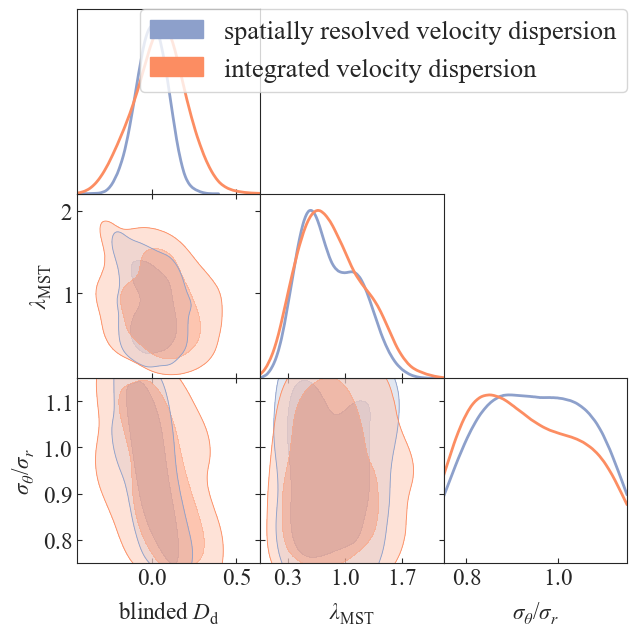

In [72]:
pf.set_fontscale(1.6)

plot_dist(['jampy', 'jampy'], 
          ['ifu', 'single_slit'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'axisymmetric'], 
          ['powerlaw', 'powerlaw'], 
          oblate_fractions=[0.65, 0.65],
          burnin=burnin,
          legend_labels=[r'spatially resolved velocity dispersion', r'integrated velocity dispersion'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/ifu_vs_slit_compare.pdf' if savefig else None,
          font_scale=1.2,
          select_indices=[[-4, -2, -1]]*2, print_difference=True
         )

## SNR compare

(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
D uncertainty 0.09
(19200, 8) (19200, 8) (19200, 8) 0.65
(19200, 8) 8
Removed no burn in
Difference: -0.17%, -0.01 sigma, D uncertainty: 0.11


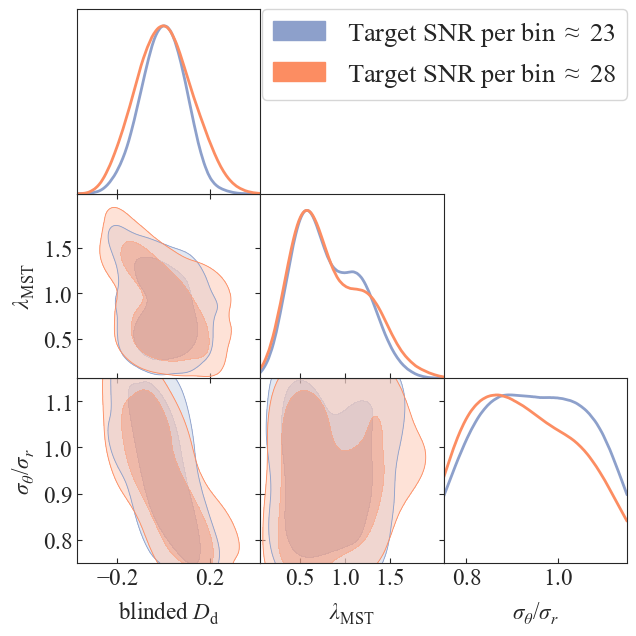

In [74]:
plot_dist(['jampy', 'jampy'],
          ['ifu', 'ifu'], 
          ['constant', 'constant'], 
          ['axisymmetric', 'axisymmetric'], 
          ['powerlaw', 'powerlaw'], 
          oblate_fractions=[.65, .65],
          snrs=[23, 28],
          burnin=burnin,
          legend_labels=[r'Target SNR per bin $\approx$ 23',
                         r'Target SNR per bin $\approx$ 28'],
          ani_param_latex=['\\sigma_{\\theta}/\\sigma_{r}'],
          save_fig='/Users/ajshajib/Dropbox/Papers_Proposals/rxj1131_kcwi/figures/snr_compare.pdf' if savefig else None,
          font_scale=1.2,
          select_indices=[[-4, -2, -1]]*2, blind=True, print_difference=True
         )